In [48]:
import pandas as pd

In [49]:
df = pd.read_csv("data_boy_clean_all.csv", encoding="gbk")

In [50]:
df = df.drop(columns=['孕妇代码'])
df = df.drop(columns=['检测孕周'])

Shapiro-Wilk正态性检验结果:
              变量    W统计量         p值     结果     偏度      峰度
0             年龄  0.9693  2.328e-14  非正态分布  0.615   1.169
1             身高  0.9904  1.716e-06  非正态分布 -0.108  -0.092
2             体重  0.9621  3.685e-16  非正态分布  0.807   1.928
3         检测抽血次数  0.8614  7.814e-30  非正态分布  0.030  -1.339
4        检测孕周_周数  0.9198  1.590e-23  非正态分布  0.608  -0.793
5          孕妇BMI  0.9429  5.421e-20  非正态分布  0.864   2.649
6          原始读段数  0.9718  1.161e-13  非正态分布  0.720   2.389
7   在参考基因组上比对的比例  0.8374  7.863e-32  非正态分布 -2.997  30.436
8        重复读段的比例  0.9584  5.347e-17  非正态分布  0.897   3.270
9           GC含量  0.9701  3.816e-14  非正态分布  0.507   3.290
10     13号染色体的Z值  0.9924  2.264e-05  非正态分布  0.329   0.687
11     18号染色体的Z值  0.9900  9.480e-07  非正态分布  0.407   0.636
12     21号染色体的Z值  0.9983     0.3875   正态分布  0.047  -0.116
13       X染色体的Z值  0.9753  1.254e-12  非正态分布  0.608   2.330
14       Y染色体的Z值  0.9592  8.321e-17  非正态分布  0.870   2.414
15        Y染色体浓度  0.9676  8.195e-15  非正态分布  0.705  

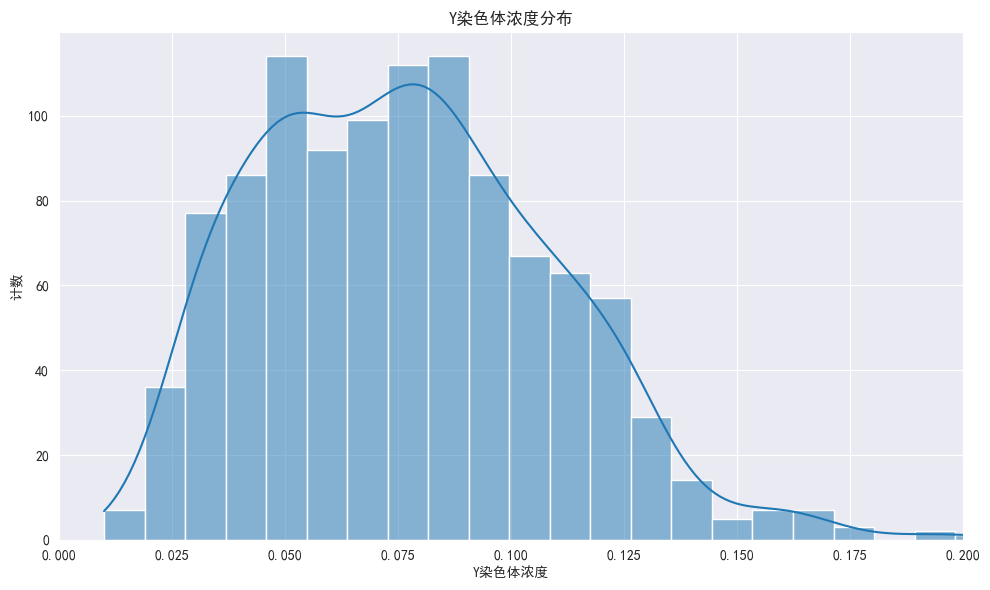

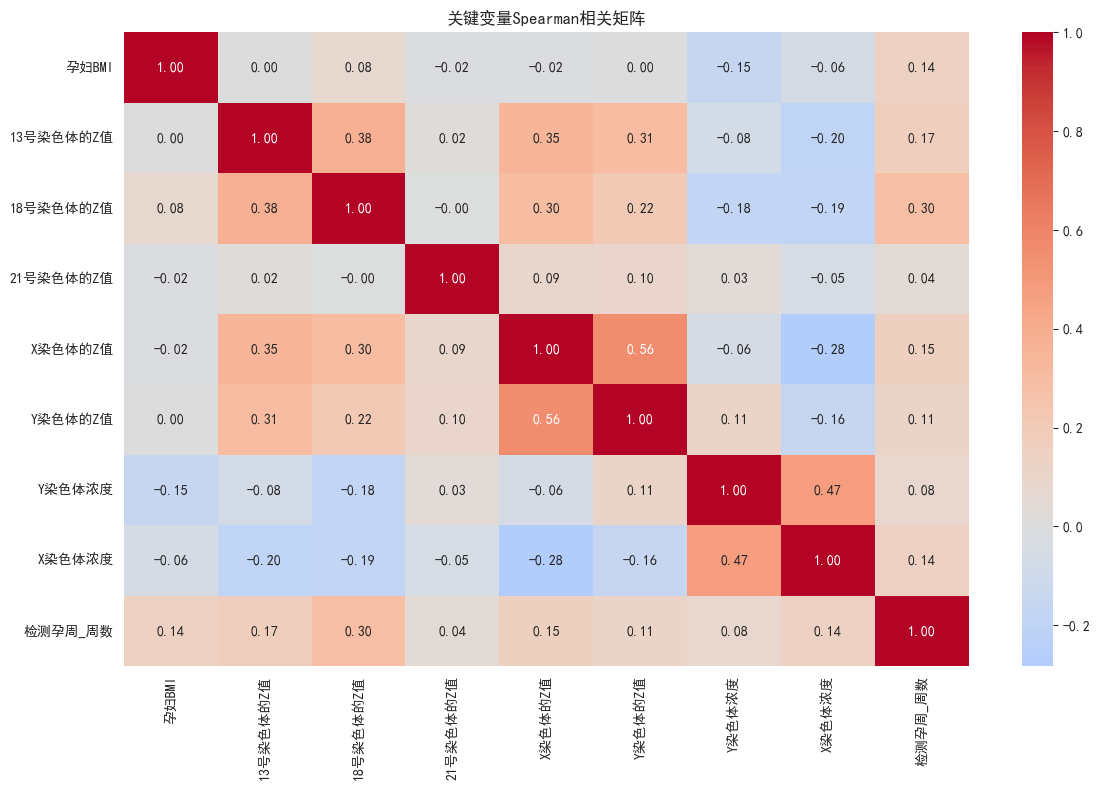


Y染色体浓度与21号染色体Z值的Spearman相关性: 0.0335 (p=2.7040e-01)


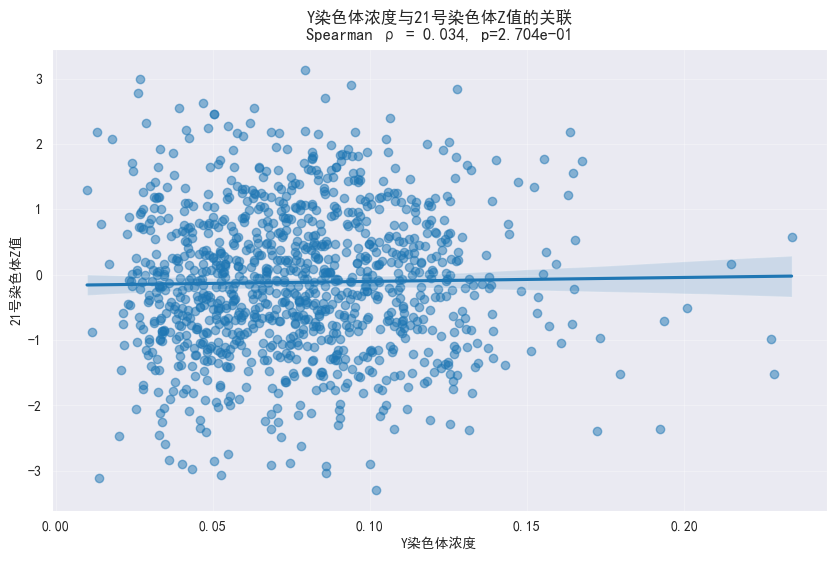

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('data_boy_clean_all.csv', encoding='gbk')

numeric_cols = [
    '年龄', '身高', '体重', '检测抽血次数', '检测孕周_周数', '孕妇BMI',
    '原始读段数', '在参考基因组上比对的比例', '重复读段的比例',
    '唯一比对的读段数', 'GC含量', '13号染色体的Z值', '18号染色体的Z值',
    '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值',
    'Y染色体浓度', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量'
]

# 转换数据类型
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Shapiro-Wilk正态性检验
def shapiro_test_with_label(data):
    """进行Shapiro-Wilk检验并返回结果标签"""
    try:
        stat, p = shapiro(data.dropna())
        return stat, p, "正态分布" if p > 0.05 else "非正态分布"
    except:
        return np.nan, np.nan, "检验失败"

# 创建结果DataFrame
normality_results = []
for col in numeric_cols:
    if col in df.columns:
        stat, p, result = shapiro_test_with_label(df[col])
        normality_results.append({
            '变量': col,
            'W统计量': round(stat, 4) if not np.isnan(stat) else 'N/A',
            'p值': f"{p:.3e}" if p < 0.001 else round(p, 4) if not np.isnan(p) else 'N/A',
            '结果': result,
            '偏度': df[col].skew().round(3),
            '峰度': df[col].kurt().round(3)
        })

# 转换为DataFrame并排序
normality_df = pd.DataFrame(normality_results)

print("Shapiro-Wilk正态性检验结果:")
print(normality_df)

# 3. Spearman相关分析
# 选择关键变量进行分析
selected_vars = [
    '孕妇BMI', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值',
    'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度', '检测孕周_周数'
]

# 计算Spearman相关系数矩阵
spearman_corr = df[selected_vars].corr(method='spearman')

print("\nSpearman相关矩阵:")
print(spearman_corr.round(2))

# 第一个图：Y染色体浓度分布
plt.figure(figsize=(10, 6))
sns.histplot(df['Y染色体浓度'].dropna(), kde=True)
plt.title('Y染色体浓度分布')
plt.xlabel('Y染色体浓度')
plt.ylabel('计数')
plt.xlim(0, 0.2)
plt.tight_layout()
plt.savefig('y_chromosome_concentration.png', dpi=600, bbox_inches='tight')
plt.show()

# 第二个图：Spearman相关热图
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('关键变量Spearman相关矩阵')
plt.tight_layout()
plt.savefig('spearman_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. 特别分析 - Y染色体浓度与21号染色体Z值的关联
y_concentration = df['Y染色体浓度'].dropna()
z_value_21 = df.loc[y_concentration.index, '21号染色体的Z值']

corr_coef, p_value = stats.spearmanr(y_concentration, z_value_21)

print(f"\nY染色体浓度与21号染色体Z值的Spearman相关性: {corr_coef:.4f} (p={p_value:.4e})")

# 绘制关联图
plt.figure(figsize=(10, 6))
sns.regplot(x=y_concentration, y=z_value_21, scatter_kws={'alpha':0.5})
plt.title(f'Y染色体浓度与21号染色体Z值的关联\nSpearman ρ = {corr_coef:.3f}, p={p_value:.3e}')
plt.xlabel('Y染色体浓度')
plt.ylabel('21号染色体Z值')
plt.grid(True, alpha=0.3)
plt.savefig('y_chromosome_analysis.png', dpi=300)
plt.show()